In [1]:
import argparse
import os
import math
import random

import torch as th
import torch.distributed as dist
import torchvision as tv
import blobfile as bf
from PIL import Image
import warnings
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
class Arguments(object):
    def __init__(self, dictionary):
        """Constructor"""
        for key in dictionary:
            setattr(self, key, dictionary[key])
            
def read_pil(path, d1=False):
    with bf.BlobFile(path, "rb") as f:
        pil_image = Image.open(f)
        pil_image.load()
        if d1:
            pil_image = pil_image.convert("L")
        else:
            pil_image = pil_image.convert("RGB")
    return pil_image

/home/as3ek/.conda/envs/hist/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [99]:
real_clz_path = "/home/as3ek/data/lizard_split_norm_bright3/instances/test2/consep_9__0_0.png"

In [100]:
# real_clz = read_pil(real_clz_path, d1=False)

with bf.BlobFile(real_clz_path, "rb") as f:
    pil_instance = Image.open(f)
    pil_instance.load()
pil_instance = pil_instance

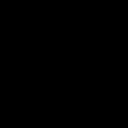

In [101]:
pil_instance

In [102]:
np.unique(np.array(pil_instance))

array([ 0,  4, 40, 41, 42], dtype=int32)

In [103]:
def get_edges(t):
    edge = th.ByteTensor(t.size()).zero_()
    edge[:, :, :, 1:] = edge[:, :, :, 1:] | (t[:, :, :, 1:] != t[:, :, :, :-1])
    edge[:, :, :, :-1] = edge[:, :, :, :-1] | (t[:, :, :, 1:] != t[:, :, :, :-1])
    edge[:, :, 1:, :] = edge[:, :, 1:, :] | (t[:, :, 1:, :] != t[:, :, :-1, :])
    edge[:, :, :-1, :] = edge[:, :, :-1, :] | (t[:, :, 1:, :] != t[:, :, :-1, :])
    return edge.float()

In [104]:
ins = th.tensor(np.array(pil_instance)[None, ])

In [105]:
edges = get_edges(ins.unsqueeze(0))

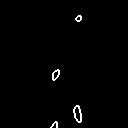

In [106]:
Image.fromarray((edges[0][0].numpy() * 255.).astype(np.uint8))

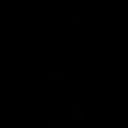

In [85]:
image_pil.convert("L")

In [22]:
fake_clz_path = "/scratch/as3ek/github/MaskDiff/saves/lr_2e-05__batch_size_64__image_size_128__num_channels_128__num_res_blocks_3__diffusion_steps_1000__noise_schedule_linear/model310000_samples/classes/synmask/190.png"

In [27]:
fake_clz = read_pil(fake_clz_path, d1=False)

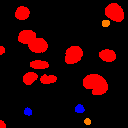

In [28]:
fake_clz